In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import cmath 
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
import random
import pylab

In [68]:
# Defining the parameters:
j=1000 
tauz=9 #tauz=[0,10]
alphaz=1
alphay=1

In [69]:
# Defining the matrix Jz:
Jz = np.zeros((2*j+1,2*j+1))
m=-j
for i in range(0,2*j+1):
    Jz[i,i] = m
    m+=1
# Computing the matrix Jz^2:
Jz2= np.dot(Jz,Jz)

In [70]:
# Defining the matrix Jy:
Jy = np.zeros((2*j+1, 2*j+1))
m = -j
for k in range(0,2*j):
    if k<2*j:
        Jy[k+1,k]=np.sqrt(j*(j+1)-m*(m+1))
        Jy[k,k+1]=-np.sqrt(j*(j+1)-m*(m+1))
        Jy[k-1,k]=-np.sqrt(j*(j+1)-m*(m-1))
        Jy[k,k-1]=np.sqrt(j*(j+1)-m*(m-1))
        m+=1

In [71]:
# Defining the arguments of the exponentials in the Floquet operator:
term1 = - ((tauz*Jz2)/(2*j+1))*complex(0,1)
term2 = - (alphaz*Jz)*complex(0,1) 
term3 = - (alphay*Jy)/2

In [72]:
# Computing the Floquet operator:
F = np.dot(expm(term1+term2),expm(term3))

In [73]:
# Obtaining the eigenvalues of the Floquet operator:
Feigen = LA.eigvals(F)

In [74]:
# Computing the phases \phi obtained by making eigenvalue=e^{i\phi}:
phi = np.zeros((2*j+1), dtype=complex)
for k in range(0,2*j+1):
    phi[k] = np.angle(Feigen[k])

In [75]:
# Ordering the phases \phi from the smallest to the largest: 
phir=np.sort(np.real(phi))

In [76]:
# Computing the difference between neighboring phases:
dif = np.zeros((2*j+1))
for i in range(0,2*j):
    dif[i]=phir[i+1]-phir[i]

In [77]:
# Normalizing the intervals between two consecutive phases:
phirbar=(2*np.pi)/(2*j+1)

In [78]:
# Defining this normalized difference:
S = dif/phirbar

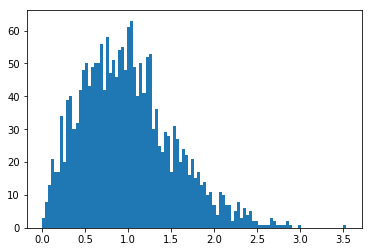

In [79]:
# Plotting the histogram of S:
plt.hist(S, bins=100)
plt.show()

In [80]:
# Now we define two random matrices, one with all (random) elements and another with the (ramdom) elements in the diagonal only:
n=2*j+1

In [81]:
# phia are the phases related to the eigenvalues of the diagonal random matrix:
phia = np.zeros((n))
for i in range(0,n):
    phia[i] = random.random()*np.pi*2 

In [82]:
# Ordering the phases from the smallest to the largest:
phiar=np.sort(np.real(phia))

In [83]:
# Defining the difference between neighboring phases:
difa = np.zeros((n-1))
for i in range(0,n-1):
    difa[i]=phiar[i+1]-phiar[i]

In [84]:
# Defining the normalized differnce:
Sa = difa/phirbar #phirbar=(2*np.pi)/(2*j+1)

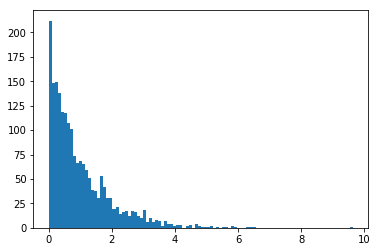

In [85]:
# Plotting the histogram:
plt.hist(Sa, bins=100)
plt.show()

In [86]:
# Random matrix (with all elements):
Fb = unitary_group.rvs(n)

In [87]:
# Taking O=FbFb^{t}
O = np.dot(Fb,Fb.T)
#confirm = O.T-O
#print(confirm)

In [88]:
# Diagonalizing:
Odiag = np.zeros((n,n), dtype=complex)

In [89]:
diag = LA.eigvals(O)

for i in range(0,n):
    Odiag[i,i]=diag[i]

In [90]:
# Getting the phases:
phib = np.zeros((n), dtype=complex)
for k in range(0,n):
    phib[k] = np.angle(Odiag[k,k])

In [91]:
# Ordering the phases:
phibr=np.sort(np.real(phib))

In [92]:
#Defining the difference:
difb = np.zeros((n-1))
for i in range(0,n-1):
    difb[i]=phibr[i+1]-phibr[i]

In [93]:
# Normalizing the difference:
Sb = difb/phirbar     #phirbar=(2*np.pi)/(2*j+1)

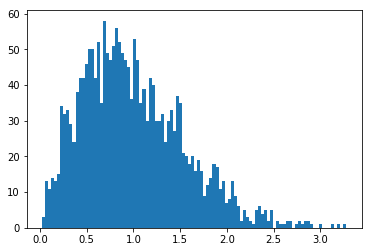

In [94]:
# Plotting the histogram:
plt.hist(Sb, bins=100)
plt.show()

In [95]:
# Dfining the functions P1 and P2, which can be compared to the histograms obtained before:
def P1(S):
    return np.exp(-S)

In [96]:
def P2(S):
    return np.exp(- np.pi*S**2/4) * np.pi*S/2

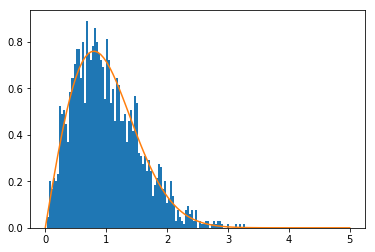

In [97]:
# Plotting the histograms and the functions together:
plt.hist(Sb, bins=100, density=1)
x = np.linspace(0,5,100) 
y = P2(x) 
pylab.plot(x,y) 
pylab.show() 
plt.show()

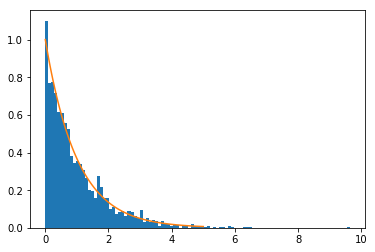

In [98]:
plt.hist(Sa, bins=100, density=1)
x = np.linspace(0,5,100) 
y = P1(x) 
pylab.plot(x,y) 
pylab.show() 
plt.show()

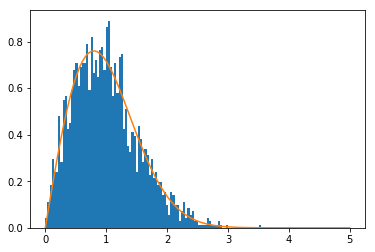

In [99]:
plt.hist(S, bins=100, density=1)
x = np.linspace(0,5,100) 
y = P2(x) 
pylab.plot(x,y) 
pylab.show() 
plt.show()